In [158]:
from sklearn.datasets import load_linnerud
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer

import seaborn as sns
import pandas as pd

In [159]:
linnerud = load_linnerud()
print(linnerud.feature_names)
print(linnerud.target_names)

['Chins', 'Situps', 'Jumps']
['Weight', 'Waist', 'Pulse']


In [160]:
n = Normalizer()
# X_train = n.fit_transform(linnerud.data)
X_train = linnerud.data / linnerud.data.max(axis=0)
X_train[:, 0] = -X_train[:, 0]
Y_train = linnerud.target[:, 0] # Weight

In [161]:
# print(linnerud.data)
print(X_train.min(axis=0))
print(X_train.max(axis=0))

[-1.          0.19920319  0.1       ]
[-0.05882353  1.          1.        ]


In [162]:
model = LinearRegression().fit(X_train, Y_train)

In [163]:
print(model.coef_)

[  8.0754481  -54.64683391  23.27209266]


<Axes: >

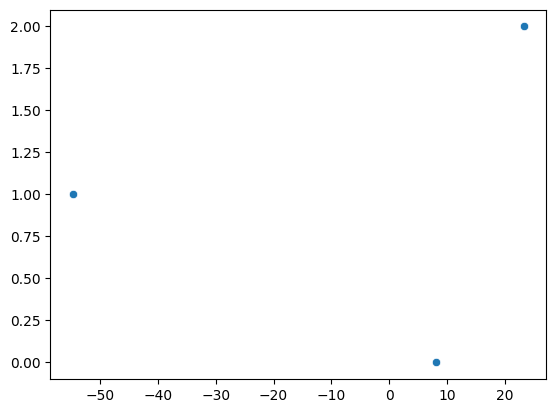

In [164]:
sns.scatterplot(x=model.coef_, y=[0, 1, 2])

In [165]:
effects = pd.DataFrame(model.coef_ * X_train, 
                       columns=['Feature A', 'Feature B', 'Feature C']) # linnerud.feature_names

Text(0.5, 0, 'Feature Effect')

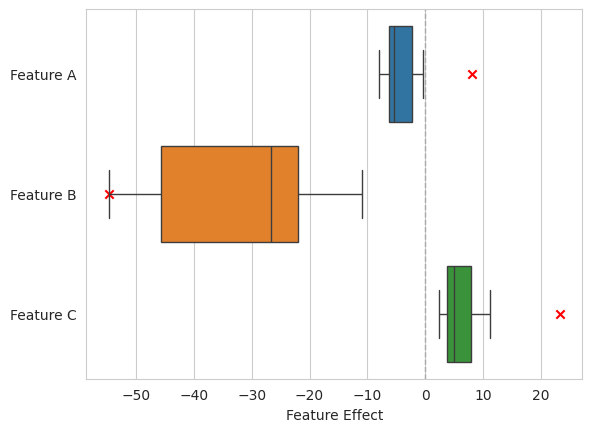

In [176]:
sns.set_style('whitegrid')
g = sns.boxplot(effects, orient='h', showfliers=False)
g.axes.axvline(0, ls='--', c='darkgray', linewidth=1)
g.axes.scatter(model.coef_, [0, 1, 2], marker='x', c='r')
g.axes.set_xlabel('Feature Effect')
# g.axes.set_xticklabels([0])
# g.axes.set_xticks([0])
# g.legend([None, None, None, 'coefficients'])